<a href="https://colab.research.google.com/github/heesukjang/Income_Prediction/blob/main/Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Income Prediction](https://www.kaggle.com/datasets/mastmustu/income)
## Is the income of the person is greater than $50K ?

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statistics import variance, stdev, mode
import random
import os

# load packages-classifiers
from scipy import interp
from scipy import stats
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *                            # confusion_matrix, log_loss, accuracy_score
from sklearn.model_selection import *                    # train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.linear_model import *                       # LinearRegression
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
from tensorflow.keras import initializers
# random.seed(2)

# visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display_html, Image

pd.options.display.float_format = '{:.2f}'.format
sns.set(style='whitegrid', palette='muted', font_scale=2)
mpl.rcParams['figure.figsize'] = (8,6)
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 12

mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

## Interactive pandas data table
# from google.colab import data_table   # alternative: %load_ext google.colab.data_table
# data_table.enable_dataframe_formatter()

# Load dataset directly from Kaggle to Colab coordinating with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import data from Google Drive
- train.csv
- test.csv

In [2]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Kaggle/test.csv')
print(df_test.shape)
print(df_test.columns)
df_test.info()

(899, 14)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-

In [3]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Kaggle/train.csv')
print(df_train.shape)
print(df_train.columns)
df_train.info()

(43957, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-

# Rename column titles


In [4]:
col_header = ['age', 'job_type', 'finacial_weight', 'education', 'edu_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
df_test.columns = col_header
print(df_test.shape)
df_test.head()

(899, 14)


,age,job_type,finacial_weight,education,edu_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [5]:
col_header.append("income_>50K")
df_train.columns = col_header
print(df_train.shape)
df_train.head()

(43957, 15)


,age,job_type,finacial_weight,education,edu_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


# Check Train/Test Split


In [6]:
train_size = round(df_train.shape[0]/(df_train.shape[0] + df_test.shape[0])*100)
test_size = 100 - train_size
print(f'Train/Test split by {train_size}%/{test_size}%')

Train/Test split by 98%/2%


# Feature selection using correlation matrix


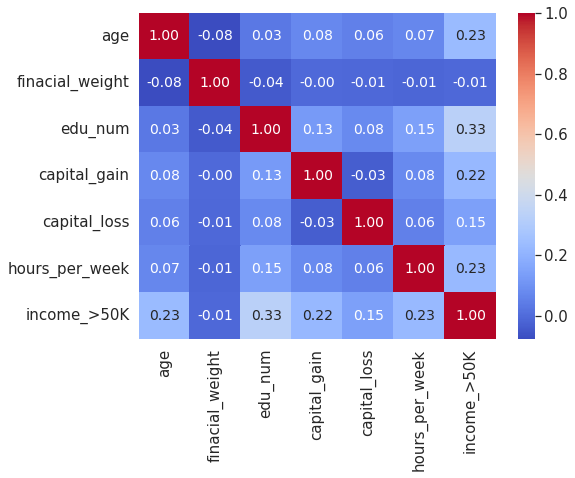

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),
            cmap='coolwarm',
            annot=True,
            annot_kws={'fontsize':14},
            fmt='.2f');

# Determine size of datasets


In [8]:
n_train, m_train = df_train.shape
n_test, m_test = df_test.shape
print(n_train, m_train)

43957 15


# Split data into X and y


In [9]:
# target variable (y) = income_>50K and drop the 'finacial_weight' feature as it appears to be uncorrelated with income
X_train = pd.DataFrame(df_train.iloc[:, :m_train]).drop('finacial_weight', axis=1) # all rows and columns
y_train = pd.DataFrame(df_train.iloc[:, -1]) # all rows and the last column
X_test = df_test.drop('finacial_weight', axis=1)
X_full = [X_train, X_test]

# TODO
features = X_train.columns
print('features:\n',features)
print(y_train.shape)
X_train.head(3)

features:
 Index(['age', 'job_type', 'education', 'edu_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_>50K'],
      dtype='object')
(43957, 1)


,age,job_type,education,edu_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_>50K
0,67,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1


# Check on Data Type


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43957 non-null  int64 
 1   job_type        41459 non-null  object
 2   education       43957 non-null  object
 3   edu_num         43957 non-null  int64 
 4   marital_status  43957 non-null  object
 5   occupation      41451 non-null  object
 6   relationship    43957 non-null  object
 7   race            43957 non-null  object
 8   gender          43957 non-null  object
 9   capital_gain    43957 non-null  int64 
 10  capital_loss    43957 non-null  int64 
 11  hours_per_week  43957 non-null  int64 
 12  native_country  43194 non-null  object
 13  income_>50K     43957 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.7+ MB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             899 non-null    int64 
 1   job_type        899 non-null    object
 2   education       899 non-null    object
 3   edu_num         899 non-null    int64 
 4   marital_status  899 non-null    object
 5   occupation      899 non-null    object
 6   relationship    899 non-null    object
 7   race            899 non-null    object
 8   gender          899 non-null    object
 9   capital_gain    899 non-null    int64 
 10  capital_loss    899 non-null    int64 
 11  hours_per_week  899 non-null    int64 
 12  native_country  899 non-null    object
dtypes: int64(5), object(8)
memory usage: 91.4+ KB


# Check on Missing Values
: Check on the missing data (NaN or NULL) and see if we can have enough number of count in each X variable as a feature ==> **Random Forest Classifier** to predict the missing values
- **occupation:** 2504 missing values (5.7%)
- **job_type:** 2498 missing values (5.7%)
- **occupation:** 763 missing values (1.7%)

In [12]:
# Fill empty values with NaN 
X_train = X_train.fillna(np.nan)
X_test = X_test.fillna(np.nan)

In [13]:
def check_missing_data(data):
  missing_count = data.isnull().sum().sort_values(ascending=False)
  percent = round(missing_count/len(data)*100, 2) 
  df_perc = pd.concat({'missing_count':missing_count, 'missing_value(%)':percent}, axis=1)
  return df_perc

check_missing_data(X_train)

,missing_count,missing_value(%)
occupation,2506,5.70
job_type,2498,5.68
native_country,763,1.74
age,0,0.00
education,0,0.00
edu_num,0,0.00
marital_status,0,0.00
relationship,0,0.00
race,0,0.00
gender,0,0.00


In [14]:
# No missing data in X_test
check_missing_data(X_test)  

,missing_count,missing_value(%)
age,0,0.00
job_type,0,0.00
education,0,0.00
edu_num,0,0.00
marital_status,0,0.00
occupation,0,0.00
relationship,0,0.00
race,0,0.00
gender,0,0.00
capital_gain,0,0.00


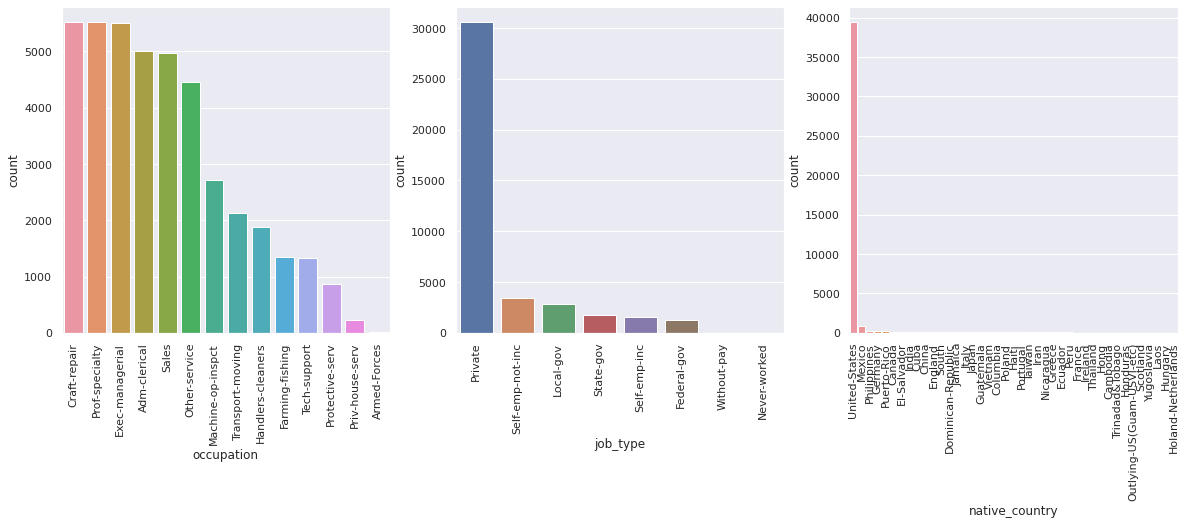

In [15]:
plt.figure(figsize=(20,6))
sns.set(font_scale=1)

plt.subplot(1,3,1)
sns.countplot(x='occupation', data=X_train, order=X_train.occupation.value_counts().index)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x='job_type', data=X_train, order=X_train.job_type.value_counts().index)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x='native_country', data=X_train, order=X_train.native_country.value_counts().index)
plt.xticks(rotation=90);

# Basic Statistics

In [16]:
X_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,43957.00,NaN,NaN,NaN,38.62,13.73,17.00,28.00,37.00,48.00,90.00
job_type,41459,8,Private,30587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,43957,16,HS-grad,14197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edu_num,43957.00,NaN,NaN,NaN,10.07,2.58,1.00,9.00,10.00,12.00,16.00
marital_status,43957,7,Married-civ-spouse,20147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,41451,14,Craft-repair,5519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,43957,6,Husband,17749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,43957,5,White,37572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,43957,2,Male,29400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_gain,43957.00,NaN,NaN,NaN,1093.56,7570.54,0.00,0.00,0.00,0.00,99999.00


# Quick Visual Glance at Data

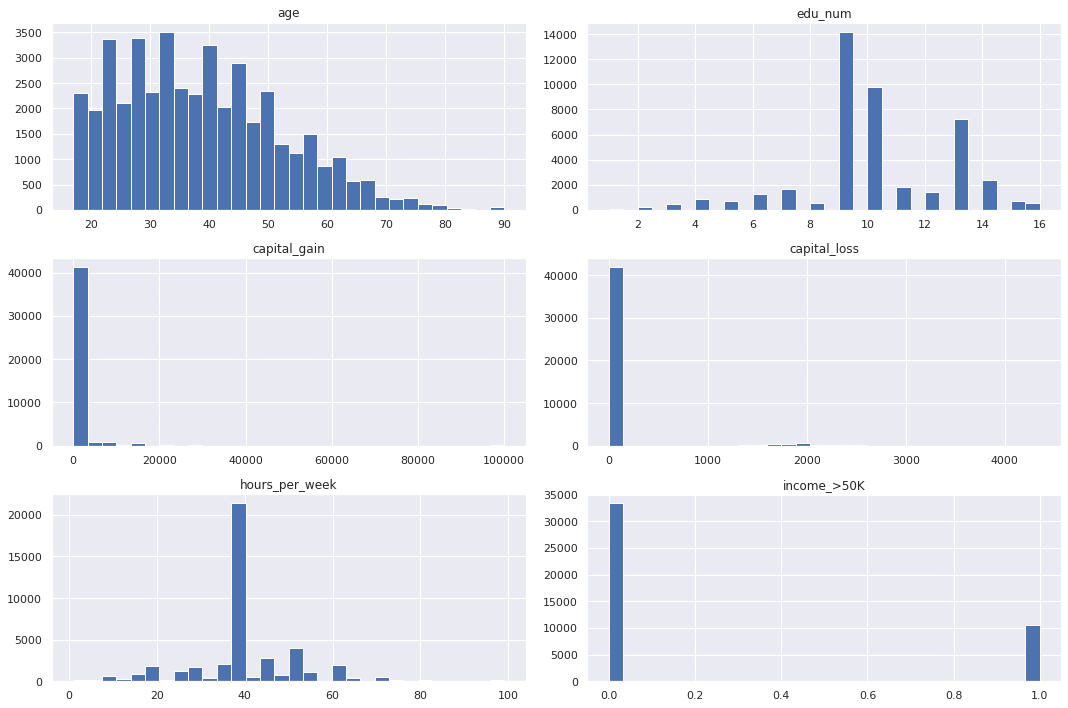

In [17]:
X_train.hist(figsize=(15,10), bins=30)
plt.tight_layout()

Index(['age', 'job_type', 'education', 'edu_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_>50K'],
      dtype='object')


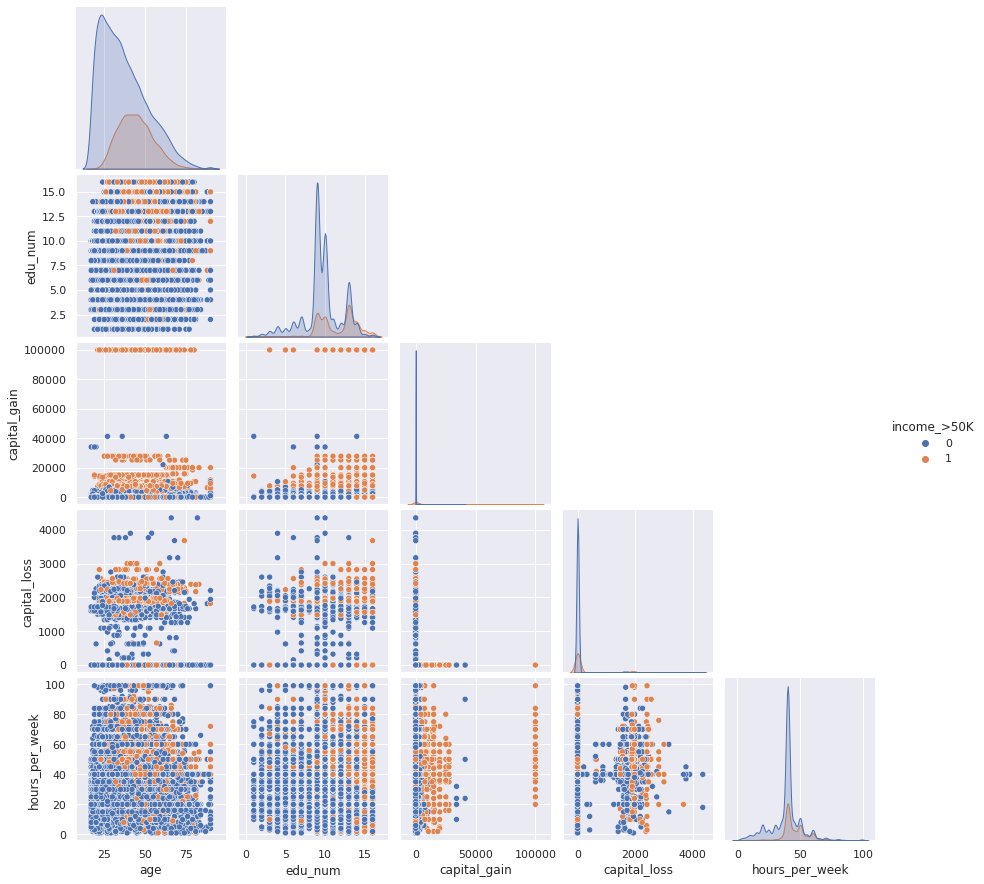

In [31]:
print(features)
# sns.pairplot(X_train[['age', 'edu_num','gender']].dropna(how='all', axis=0), hue='income_>50K')
sns.pairplot(X_train, hue='income_>50K', corner=True)

# Check on Skewness
- **age:** moderately skewed
- **edu_num:** approximately symmetric
- **capital_gain:** extremely positively (right) skewed
- **capital_loss:** highly positively (right) skewed
- **hours_per_week:** approximately symmetric
- **income_>50K:** highly positively (right) skewed

In [19]:
skewness_Xtrain = pd.DataFrame(X_train.skew())
skewness_Xtrain

,0
age,0.56
edu_num,-0.32
capital_gain,11.76
capital_loss,4.55
hours_per_week,0.24
income_>50K,1.22


In [20]:
skewness_Xtest = pd.DataFrame(X_test.skew())
skewness_Xtest

,0
age,0.57
edu_num,-0.20
capital_gain,14.83
capital_loss,3.78
hours_per_week,0.57


In [21]:
print(len(df_train.occupation.unique()))
df_train.occupation.unique()

15


array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', nan, 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [22]:
print(df_train.columns)

Index(['age', 'job_type', 'finacial_weight', 'education', 'edu_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_>50K'],
      dtype='object')


# Feature Correlation

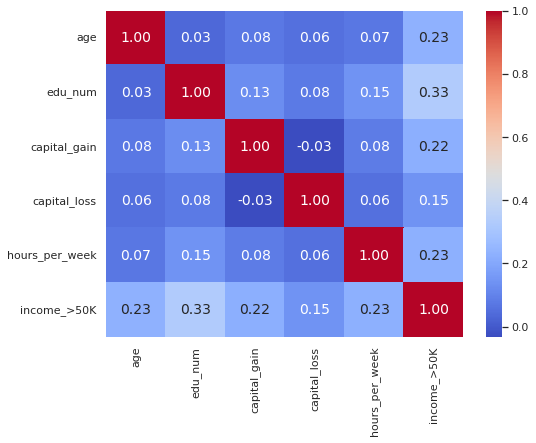

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(),
            cmap='coolwarm',
            annot=True,
            annot_kws={'fontsize':14},
            fmt='.2f');

In [24]:
# highest correlated with correlation of features with 'income'
corr_with_income = pd.DataFrame(X_train.corr()['income_>50K'].sort_values(ascending=False)[1:])
corr_with_income

,income_>50K
edu_num,0.33
age,0.23
hours_per_week,0.23
capital_gain,0.22
capital_loss,0.15


Text(0, 0.5, 'Correlation Coefficients')

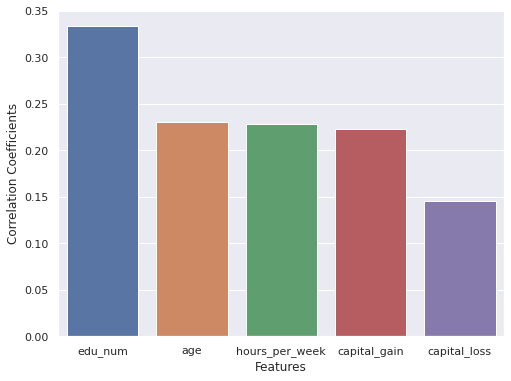

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_income.index.values,
           y=corr_with_income['income_>50K'].tolist())
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficients', fontsize=12)

# Create Age Category



In [26]:
X_train[['age']].describe()

,age
count,43957.00
mean,38.62
std,13.73
min,17.00
25%,28.00
50%,37.00
75%,48.00
max,90.00


In [27]:
X_train['age'].isnull().unique()

array([False])

In [28]:
age_category = pd.cut(X_train['age'], 
                      [18, 25, 65, 90],
                      labels=['Young Adult','Adult','Senior'])
print(age_category)

# for x in 

0             Senior
1                NaN
2              Adult
3              Adult
4        Young Adult
            ...     
43952          Adult
43953    Young Adult
43954          Adult
43955          Adult
43956          Adult
Name: age, Length: 43957, dtype: category
Categories (3, object): ['Young Adult' < 'Adult' < 'Senior']


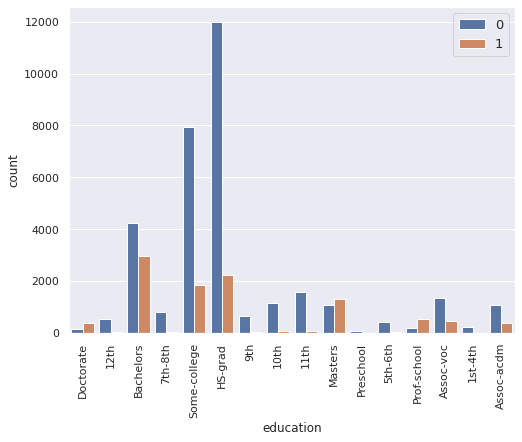

In [29]:
sns.countplot(data=X_train, x='education', hue='income_>50K')
plt.xticks(rotation=90)
plt.legend(fontsize=13);

# Convert categorical data using pandas replace()


# Feature Normalization using StandardScaler()
